# Imports

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
data_path = '/content/drive/MyDrive/Colab Notebooks/Portfolio/Starbucks/Data'

In [3]:
import os
import os.path
import pandas as pd

In [4]:
offer = pd.read_csv(os.path.join(data_path, 'portfolio.csv'))
customer = pd.read_csv(os.path.join(data_path, 'profile.csv'))
event = pd.read_csv(os.path.join(data_path, 'transcript.csv'))

# Preprocessing

## Offer Dataset

In [5]:
offer

,Unnamed: 0,reward,channels,difficulty,duration,offer_type,id
0,0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,5,3,"['web', 'email', 'mobile', 'social']",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,6,2,"['web', 'email', 'mobile', 'social']",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,7,0,"['email', 'mobile', 'social']",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,8,5,"['web', 'email', 'mobile', 'social']",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,9,2,"['web', 'email', 'mobile']",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [6]:
offer.drop(columns=['Unnamed: 0'], inplace=True)

In [7]:
offer.isnull().sum()

,0
reward,0
channels,0
difficulty,0
duration,0
offer_type,0
id,0


In [8]:
# Sort the 'offer' data
offer = offer.sort_values(['offer_type', 'difficulty']).reset_index(drop = True)

# Add a column 'offer_alias'
from string import ascii_uppercase
offer['offer_alias'] = [ascii_uppercase[i] for i in range(offer.shape[0])]

offer

,reward,channels,difficulty,duration,offer_type,id,offer_alias
0,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,A
1,5,"['web', 'email', 'mobile', 'social']",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,B
2,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,C
3,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,D
4,3,"['web', 'email', 'mobile', 'social']",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,E
5,2,"['web', 'email', 'mobile', 'social']",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,F
6,2,"['web', 'email', 'mobile']",10,7,discount,2906b810c7d4411798c6938adc9daaa5,G
7,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,H
8,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed,I
9,0,"['email', 'mobile', 'social']",0,3,informational,5a8bc65990b245e5a138643cd4eb9837,J


In [9]:
offer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   reward       10 non-null     int64 
 1   channels     10 non-null     object
 2   difficulty   10 non-null     int64 
 3   duration     10 non-null     int64 
 4   offer_type   10 non-null     object
 5   id           10 non-null     object
 6   offer_alias  10 non-null     object
dtypes: int64(3), object(4)
memory usage: 692.0+ bytes


## Customer Dataset

In [10]:
customer

,Unnamed: 0,gender,age,id,became_member_on,income
0,0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,4,NaN,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
...,...,...,...,...,...,...
16995,16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0
16996,16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0
16997,16997,M,49,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0
16998,16998,F,83,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0


In [11]:
customer.drop(columns=['Unnamed: 0'], inplace=True)

In [12]:
customer.isnull().sum()

,0
gender,2175
age,0
id,0
became_member_on,0
income,2175


In [13]:
# Check unique values in the 'gender' column
customer['gender'].unique()

array([nan, 'F', 'M', 'O'], dtype=object)

In [14]:
# Replace 'O' (Other) with  'Other' and fill missing values with 'Other'
customer['gender'] = customer['gender'].replace({'O': 'Other'}).fillna('Other')

In [15]:
# Remove customers with unrealistic ages
customer = customer[customer['age'] < 100]

In [16]:
# Convert 'became_member_on' to datetime format
customer['became_member_on'] = pd.to_datetime(customer['became_member_on'], format='%Y%m%d')

<ipython-input-16-100f663d6c0b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer['became_member_on'] = pd.to_datetime(customer['became_member_on'], format='%Y%m%d')


In [17]:
# Remove customers with no income
customer = customer.dropna(subset=['income'])

In [18]:
customer.isnull().sum()

,0
gender,0
age,0
id,0
became_member_on,0
income,0


In [19]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14808 entries, 1 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   gender            14808 non-null  object        
 1   age               14808 non-null  int64         
 2   id                14808 non-null  object        
 3   became_member_on  14808 non-null  datetime64[ns]
 4   income            14808 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 694.1+ KB


## Event Dataset

In [20]:
event

,Unnamed: 0,person,event,value,time
0,0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...,...
306529,306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714


In [21]:
event.drop(columns=['Unnamed: 0'], inplace=True)

In [22]:
# Ensure 'value' column is parsed from string to dictionary
import ast
event['value'] = event['value'].apply(ast.literal_eval)

# Extract keys and values from 'value' column
rows = []
for _, row in event.iterrows():
  for key, val in row['value'].items():
    new_row = {
        'person': row['person'],
        'event': row['event'],
        'dict_key': key,
        'dict_value': val,
        'hours_since_start': row['time']
        }
    rows.append(new_row)

# Display results
event_df = pd.DataFrame(rows)
event_df

,person,event,dict_key,dict_value,hours_since_start
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,offer id,9b98b8c7a33c4b65b9aebfe6a799e6d9,0
1,a03223e636434f42ac4c3df47e8bac43,offer received,offer id,0b1e1539f2cc45b7b9fa7c272da2e1d7,0
2,e2127556f4f64592b11af22de27a7932,offer received,offer id,2906b810c7d4411798c6938adc9daaa5,0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,offer id,fafdcd668e3743c1bb461111dcafc2a4,0
4,68617ca6246f4fbc85e91a2a49552598,offer received,offer id,4d5c57ea9a6940dd891ad53e9dbe8da0,0
...,...,...,...,...,...
340108,b3a1272bc9904337b331bf348c3e8c17,transaction,amount,1.59,714
340109,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,amount,9.53,714
340110,a00058cf10334a308c68e7631c529907,transaction,amount,3.61,714
340111,76ddbd6576844afe811f1a3c0fbb5bec,transaction,amount,3.53,714


In [23]:
# Create a column for only offer-related events
event_df['offer_id'] = event_df.apply(
    lambda row: row['dict_value'] if row['dict_key'] != 'amount' else None, axis=1)

In [24]:
# Create a column for only numeric amounts
event_df['amount_spent'] = pd.to_numeric(
    event_df.apply(lambda row: row['dict_value'] if row['dict_key'] == 'amount' else None, axis=1),
    errors='coerce')

event_df['amount_spent'].fillna(0, inplace=True)

<ipython-input-24-4f29e25d0fc2>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  event_df['amount_spent'].fillna(0, inplace=True)


In [25]:
# Drop duplicate columns
event_df.drop(columns=['dict_key', 'dict_value'], inplace=True)

In [26]:
# Add a column 'days_since_start'
event_df = event_df.assign(days_since_start=(event_df['hours_since_start'] / 24).astype('int64'))

# Print the minimum and maximum day
print(f'Minimum day: {event_df["days_since_start"].min()}')
print(f'Maximum day: {event_df["days_since_start"].max()}')

Minimum day: 0
Maximum day: 29


In [27]:
event_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340113 entries, 0 to 340112
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   person             340113 non-null  object 
 1   event              340113 non-null  object 
 2   hours_since_start  340113 non-null  int64  
 3   offer_id           201160 non-null  object 
 4   amount_spent       340113 non-null  float64
 5   days_since_start   340113 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 15.6+ MB


## Merge Datasets

In [28]:
merged_df = pd.merge(event_df, offer, left_on='offer_id', right_on='id', how='left')
merged_df

,person,event,hours_since_start,offer_id,amount_spent,days_since_start,reward,channels,difficulty,duration,offer_type,id,offer_alias
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.00,0,5.0,"['web', 'email', 'mobile']",5.0,7.0,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,A
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0.00,0,5.0,"['web', 'email']",20.0,10.0,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,H
2,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5,0.00,0,2.0,"['web', 'email', 'mobile']",10.0,7.0,discount,2906b810c7d4411798c6938adc9daaa5,G
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,fafdcd668e3743c1bb461111dcafc2a4,0.00,0,2.0,"['web', 'email', 'mobile', 'social']",10.0,10.0,discount,fafdcd668e3743c1bb461111dcafc2a4,F
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,4d5c57ea9a6940dd891ad53e9dbe8da0,0.00,0,10.0,"['web', 'email', 'mobile', 'social']",10.0,5.0,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...
340108,b3a1272bc9904337b331bf348c3e8c17,transaction,714,None,1.59,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340109,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,714,None,9.53,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340110,a00058cf10334a308c68e7631c529907,transaction,714,None,3.61,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340111,76ddbd6576844afe811f1a3c0fbb5bec,transaction,714,None,3.53,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
merged_df = pd.merge(merged_df, customer, left_on='person', right_on='id', how='left')
merged_df

,person,event,hours_since_start,offer_id,amount_spent,days_since_start,reward,channels,difficulty,duration,offer_type,id_x,offer_alias,gender,age,id_y,became_member_on,income
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.00,0,5.0,"['web', 'email', 'mobile']",5.0,7.0,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,A,F,75.0,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0.00,0,5.0,"['web', 'email']",20.0,10.0,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,H,NaN,NaN,NaN,NaT,NaN
2,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5,0.00,0,2.0,"['web', 'email', 'mobile']",10.0,7.0,discount,2906b810c7d4411798c6938adc9daaa5,G,M,68.0,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,fafdcd668e3743c1bb461111dcafc2a4,0.00,0,2.0,"['web', 'email', 'mobile', 'social']",10.0,10.0,discount,fafdcd668e3743c1bb461111dcafc2a4,F,NaN,NaN,NaN,NaT,NaN
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,4d5c57ea9a6940dd891ad53e9dbe8da0,0.00,0,10.0,"['web', 'email', 'mobile', 'social']",10.0,5.0,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,D,NaN,NaN,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340108,b3a1272bc9904337b331bf348c3e8c17,transaction,714,None,1.59,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,66.0,b3a1272bc9904337b331bf348c3e8c17,2018-01-01,47000.0
340109,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,714,None,9.53,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,52.0,68213b08d99a4ae1b0dcb72aebd9aa35,2018-04-08,62000.0
340110,a00058cf10334a308c68e7631c529907,transaction,714,None,3.61,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,63.0,a00058cf10334a308c68e7631c529907,2013-09-22,52000.0
340111,76ddbd6576844afe811f1a3c0fbb5bec,transaction,714,None,3.53,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,57.0,76ddbd6576844afe811f1a3c0fbb5bec,2016-07-09,40000.0


In [30]:
merged_df.drop(columns=['id_x', 'id_y'], inplace=True)
merged_df

,person,event,hours_since_start,offer_id,amount_spent,days_since_start,reward,channels,difficulty,duration,offer_type,offer_alias,gender,age,became_member_on,income
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.00,0,5.0,"['web', 'email', 'mobile']",5.0,7.0,bogo,A,F,75.0,2017-05-09,100000.0
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0.00,0,5.0,"['web', 'email']",20.0,10.0,discount,H,NaN,NaN,NaT,NaN
2,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5,0.00,0,2.0,"['web', 'email', 'mobile']",10.0,7.0,discount,G,M,68.0,2018-04-26,70000.0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,fafdcd668e3743c1bb461111dcafc2a4,0.00,0,2.0,"['web', 'email', 'mobile', 'social']",10.0,10.0,discount,F,NaN,NaN,NaT,NaN
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,4d5c57ea9a6940dd891ad53e9dbe8da0,0.00,0,10.0,"['web', 'email', 'mobile', 'social']",10.0,5.0,bogo,D,NaN,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340108,b3a1272bc9904337b331bf348c3e8c17,transaction,714,None,1.59,29,NaN,NaN,NaN,NaN,NaN,NaN,M,66.0,2018-01-01,47000.0
340109,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,714,None,9.53,29,NaN,NaN,NaN,NaN,NaN,NaN,M,52.0,2018-04-08,62000.0
340110,a00058cf10334a308c68e7631c529907,transaction,714,None,3.61,29,NaN,NaN,NaN,NaN,NaN,NaN,F,63.0,2013-09-22,52000.0
340111,76ddbd6576844afe811f1a3c0fbb5bec,transaction,714,None,3.53,29,NaN,NaN,NaN,NaN,NaN,NaN,M,57.0,2016-07-09,40000.0


In [31]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340113 entries, 0 to 340112
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   person             340113 non-null  object        
 1   event              340113 non-null  object        
 2   hours_since_start  340113 non-null  int64         
 3   offer_id           201160 non-null  object        
 4   amount_spent       340113 non-null  float64       
 5   days_since_start   340113 non-null  int64         
 6   reward             167581 non-null  float64       
 7   channels           167581 non-null  object        
 8   difficulty         167581 non-null  float64       
 9   duration           167581 non-null  float64       
 10  offer_type         167581 non-null  object        
 11  offer_alias        167581 non-null  object        
 12  gender             304829 non-null  object        
 13  age                304829 non-null  float64 

In [32]:
# Export the merged dataset
merged_df.to_csv(os.path.join(data_path, 'merged_data.csv'), index=False)

# Exploratory Data Analysis

In [33]:
import matplotlib.pyplot as plt

## Customer Profile

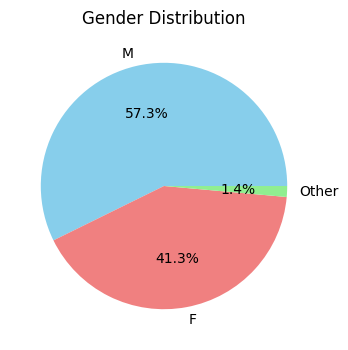

In [34]:
# Gender distribution
gender_counts = customer['gender'].value_counts()

plt.figure(figsize=(6,4))
gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

Majority of customers are male, followed by female, with a smaller "Other" group.

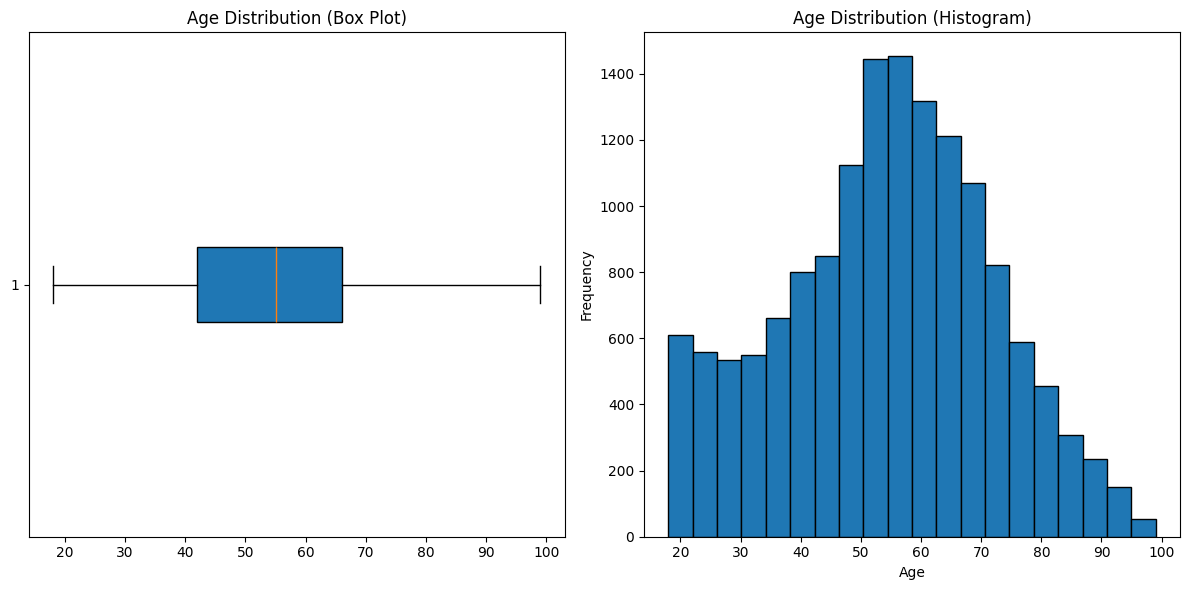

In [35]:
# Age distribution
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.boxplot(customer['age'], vert=False, patch_artist=True, showfliers=False)
plt.title('Age Distribution (Box Plot)')

plt.subplot(1, 2, 2)
plt.hist(customer['age'], bins=20, edgecolor='black')
plt.title('Age Distribution (Histogram)')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Most customers are between 40 and 70 years old, with a peak around 50–60 years, representing a mature, working-age population.

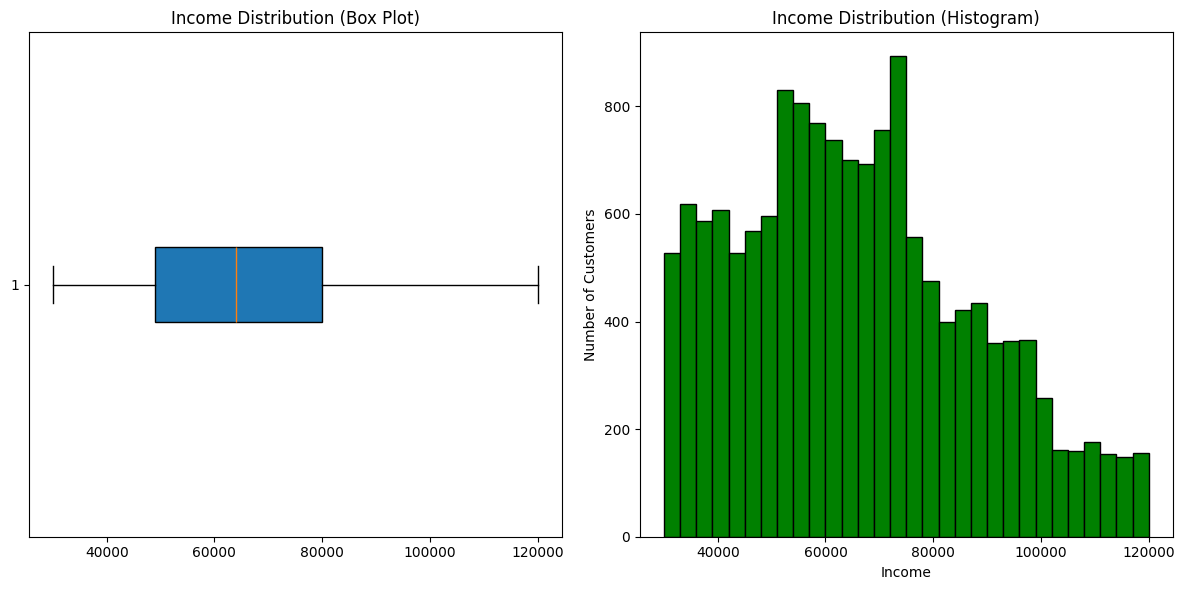

In [36]:
# Income distribution
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.boxplot(customer['income'], vert=False, patch_artist=True, showfliers=False)
plt.title('Income Distribution (Box Plot)')

plt.subplot(1, 2, 2)
plt.hist(customer['income'], bins=30, edgecolor='black', color='green')
plt.title('Income Distribution (Histogram)')
plt.xlabel('Income')
plt.ylabel('Number of Customers')

plt.tight_layout()
plt.show()

Customer incomes mainly range from 50,000 to 80,000, indicating a middle- to upper-middle-class customer base.

## Offer Portfolio

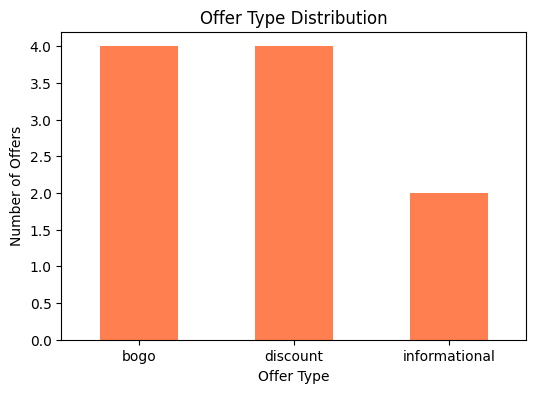

In [37]:
# Offer type distribution
offer_type_counts = offer['offer_type'].value_counts()

plt.figure(figsize=(6,4))
offer_type_counts.plot(kind='bar', color='coral')
plt.title('Offer Type Distribution')
plt.xlabel('Offer Type')
plt.ylabel('Number of Offers')
plt.xticks(rotation=0)
plt.show()

Starbucks promoted BOGO (Buy-One-Get-One) and Discount offers equally (~4 each), while Informational offers (no reward, just marketing) were less common.

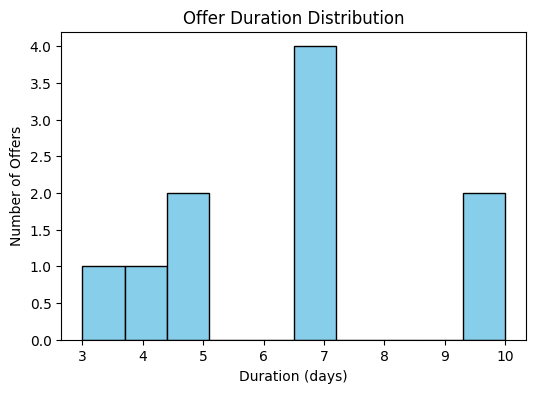

In [38]:
# Duration distribution
plt.figure(figsize=(6,4))
plt.hist(offer['duration'], bins=10, edgecolor='black', color='skyblue')
plt.title('Offer Duration Distribution')
plt.xlabel('Duration (days)')
plt.ylabel('Number of Offers')
plt.show()

Most offers lasted around 5 to 7 days, while longer 10-day offers were less common. Shorter 3–4 day offers were even rarer.

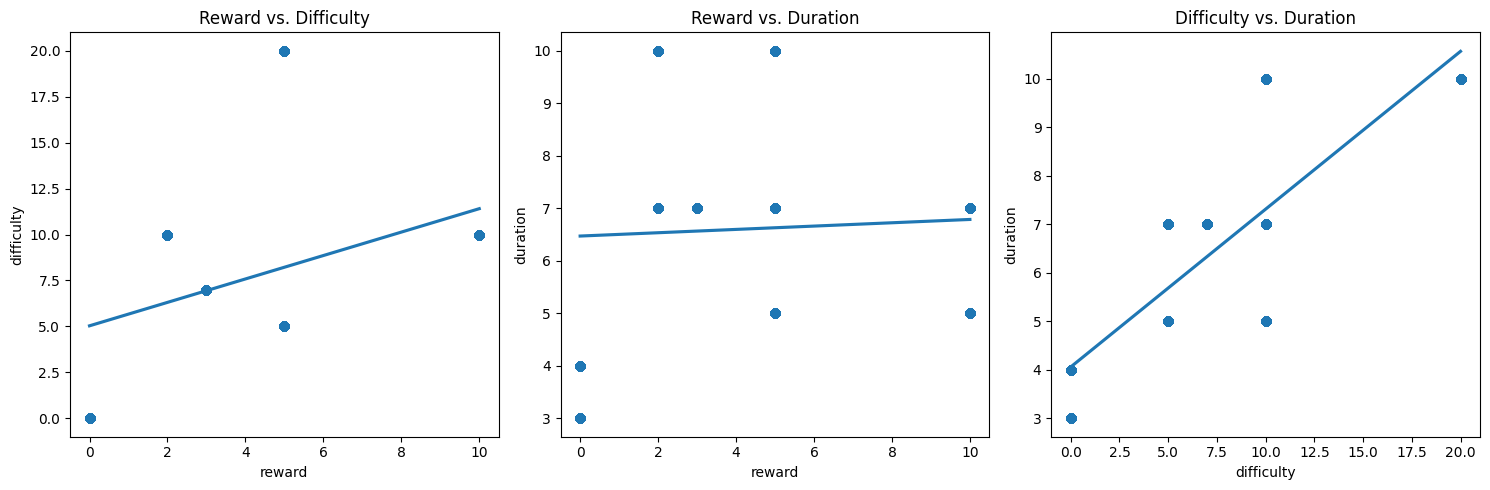

In [39]:
# Scatterplots
import seaborn as sns

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.regplot(data=merged_df, x='reward', y='difficulty', scatter_kws={'alpha':0.5})
plt.title('Reward vs. Difficulty')

plt.subplot(1, 3, 2)
sns.regplot(data=merged_df, x='reward', y='duration', scatter_kws={'alpha':0.5})
plt.title('Reward vs. Duration')

plt.subplot(1, 3, 3)
sns.regplot(data=merged_df, x='difficulty', y='duration', scatter_kws={'alpha':0.5})
plt.title('Difficulty vs. Duration')

plt.tight_layout()
plt.show()

Higher rewards come with higher difficulty, and difficult offers are typically available for a longer period, giving customers more time to complete them.

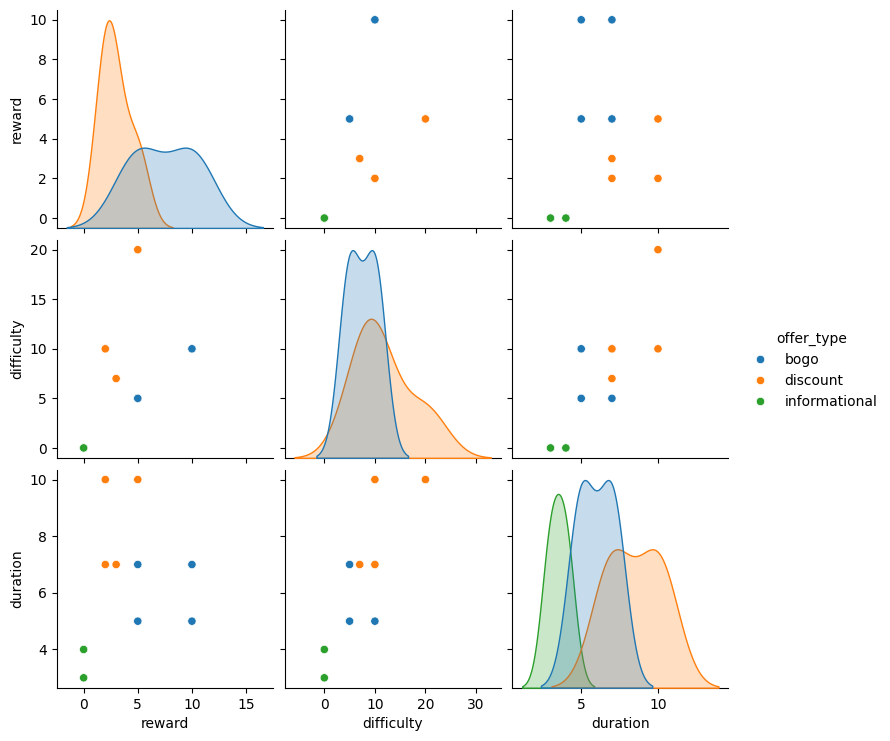

In [40]:
# Pairplots
import seaborn as sns
sns.pairplot(offer, hue='offer_type')

BOGO and Discount offers offer tangible rewards but differ in difficulty and duration. Discount offers are more variable in difficulty and tend to last longer. Informational offers, as expected, provide no rewards and are easier and shorter in duration.

## Customer Event Behavior

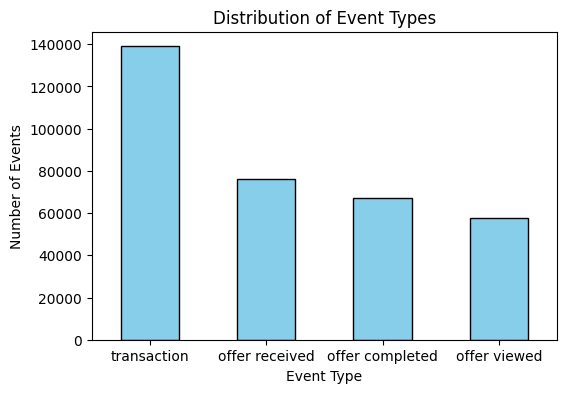

In [41]:
# Event distribution
event_counts = event_df['event'].value_counts()

plt.figure(figsize=(6,4))
event_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Event Types')
plt.xlabel('Event Type')
plt.ylabel('Number of Events')
plt.xticks(rotation=0)
plt.show()

Transactions are the most frequent events, followed by offer received, offer completed, and offer viewed. This suggests that while transactions are common, not all customers fully engage with the offer cycle.

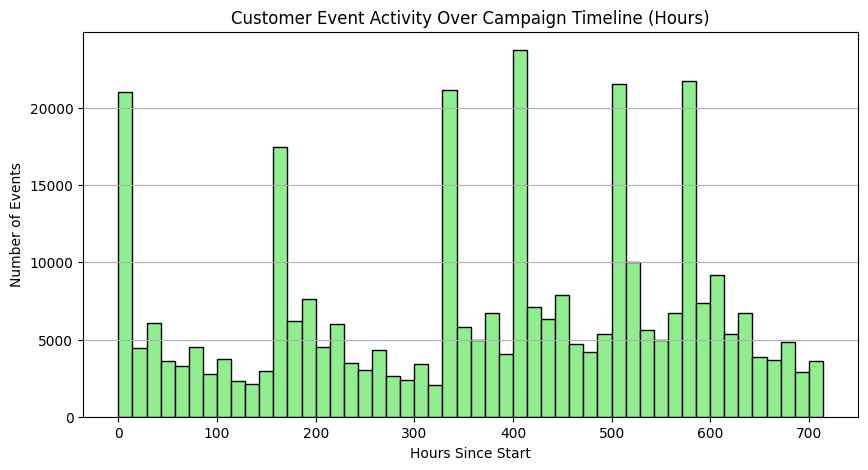

In [42]:
# Number of events over time
plt.figure(figsize=(10,5))
plt.hist(event_df['hours_since_start'], bins=50, edgecolor='black', color='lightgreen')
plt.title('Customer Event Activity Over Campaign Timeline (Hours)')
plt.xlabel('Hours Since Start')
plt.ylabel('Number of Events')
plt.grid(axis='y')
plt.show()

Customer activity shows clear spikes at regular intervals throughout the campaign, possibly linked to marketing pushes or offer release schedules. Activity peaks roughly every few days, indicating bursts of customer engagement.

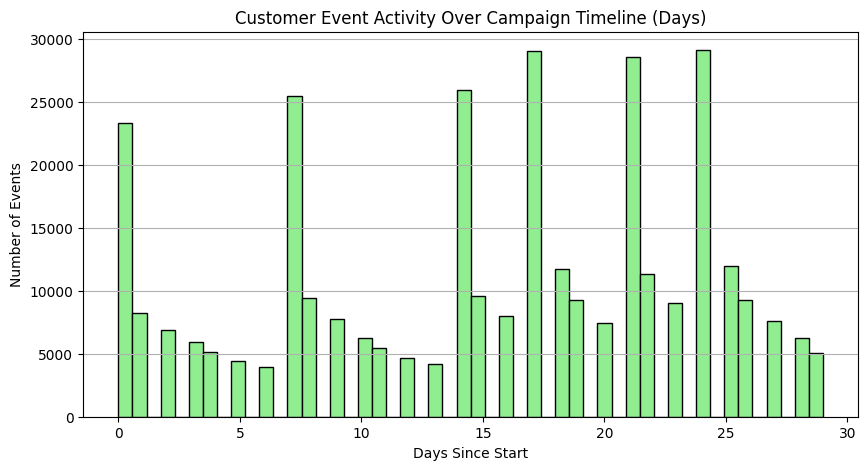

In [43]:
# Number of events over days
plt.figure(figsize=(10,5))
plt.hist(event_df['days_since_start'], bins=50, edgecolor='black', color='lightgreen')
plt.title('Customer Event Activity Over Campaign Timeline (Days)')
plt.xlabel('Days Since Start')
plt.ylabel('Number of Events')
plt.grid(axis='y')
plt.show()

Customer engagement spikes periodically throughout the campaign, indicating the impact of scheduled offer releases.

## Offer Effectiveness

In [44]:
# Filter only offer-related events
offer_events = merged_df[merged_df['event'].isin(['offer received', 'offer viewed', 'offer completed'])]

# Quick check
print(offer_events['event'].unique())
print(offer_events.shape)

['offer received' 'offer viewed' 'offer completed']
(201160, 16)


In [45]:
# Create indicator columns for viewed and completed offers

# Create a 'viewed' column: 1 if event is 'offer viewed', else 0
offer_events['viewed'] = (offer_events['event'] == 'offer viewed').astype(int)

# Create a 'completed' column: 1 if event is 'offer completed', else 0
offer_events['completed'] = (offer_events['event'] == 'offer completed').astype(int)

# Preview
offer_events[['person', 'offer_id', 'event', 'viewed', 'completed']].head()

<ipython-input-45-1e263c2a6482>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  offer_events['viewed'] = (offer_events['event'] == 'offer viewed').astype(int)
<ipython-input-45-1e263c2a6482>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  offer_events['completed'] = (offer_events['event'] == 'offer completed').astype(int)


,person,offer_id,event,viewed,completed
0,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,offer received,0,0
1,a03223e636434f42ac4c3df47e8bac43,0b1e1539f2cc45b7b9fa7c272da2e1d7,offer received,0,0
2,e2127556f4f64592b11af22de27a7932,2906b810c7d4411798c6938adc9daaa5,offer received,0,0
3,8ec6ce2a7e7949b1bf142def7d0e0586,fafdcd668e3743c1bb461111dcafc2a4,offer received,0,0
4,68617ca6246f4fbc85e91a2a49552598,4d5c57ea9a6940dd891ad53e9dbe8da0,offer received,0,0


In [46]:
# Group by offer_alias and calculate total received, viewed, and completed
offer_summary = offer_events.groupby('offer_alias').agg(
    total_received = ('event', lambda x: (x == 'offer received').sum()),
    total_viewed = ('viewed', 'sum'),
    total_completed = ('completed', 'sum')
).reset_index()

# Calculate view rate and completion rate
offer_summary['view_rate'] = offer_summary['total_viewed'] / offer_summary['total_received']
offer_summary['completion_rate'] = offer_summary['total_completed'] / offer_summary['total_viewed']

# Preview the summary
offer_summary

,offer_alias,total_received,total_viewed,total_completed,view_rate,completion_rate
0,A,7677,4171,4354,0.543311,1.043874
1,B,7571,7264,4296,0.959451,0.591410
2,C,7658,6716,3688,0.876991,0.549136
3,D,7593,7298,3331,0.961148,0.456426
4,E,7646,7337,5156,0.959587,0.702740
5,F,7597,7327,5317,0.964460,0.725672
6,G,7632,4118,4017,0.539570,0.975474
7,H,7668,2663,3420,0.347287,1.284266
8,I,7617,4144,0,0.544046,0.000000
9,J,7618,6687,0,0.877789,0.000000


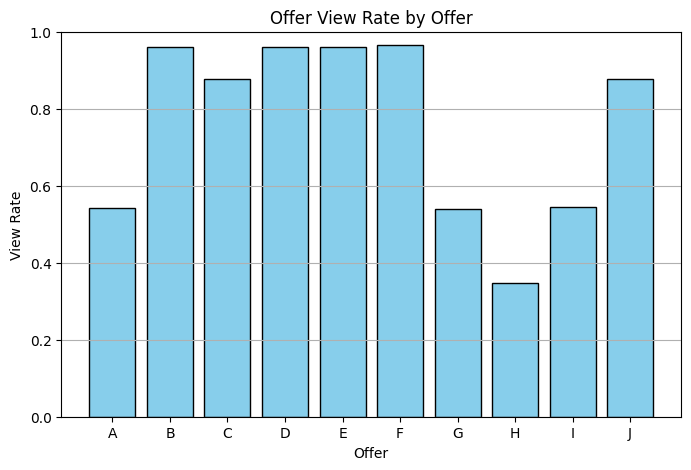

In [47]:
# Plot view rate
plt.figure(figsize=(8,5))
plt.bar(offer_summary['offer_alias'], offer_summary['view_rate'], color='skyblue', edgecolor='black')
plt.title('Offer View Rate by Offer')
plt.xlabel('Offer')
plt.ylabel('View Rate')
plt.ylim(0, 1)  # since rate is between 0 and 1
plt.grid(axis='y')
plt.show()

Offers B, D, E, F had the highest view rates (close to 1), meaning almost every customer who received them also viewed them.

Offers G, H, I had much lower view rates, suggesting that these offers were less attractive or less noticed after being received.

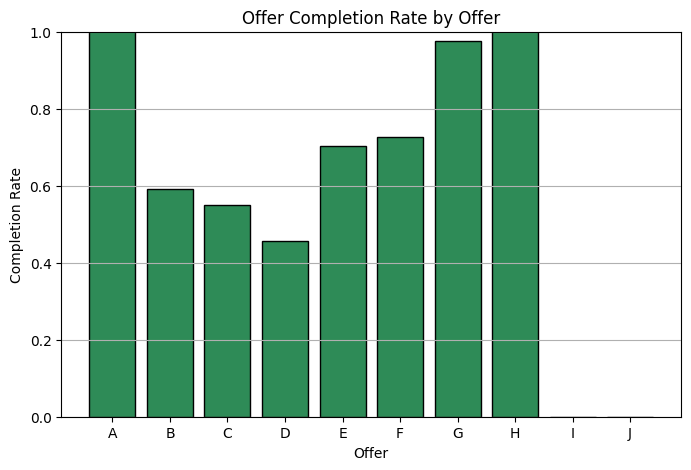

In [48]:
# Plot completion rate
plt.figure(figsize=(8,5))
plt.bar(offer_summary['offer_alias'], offer_summary['completion_rate'], color='seagreen', edgecolor='black')
plt.title('Offer Completion Rate by Offer')
plt.xlabel('Offer')
plt.ylabel('Completion Rate')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

Offers G and H (although not viewed much) had very high completion rates — if they were viewed, customers were highly motivated to complete them.

Offers I and J had zero completion rates, meaning either they were never completed or were not effective even if viewed.

## Customer Spending Behavior

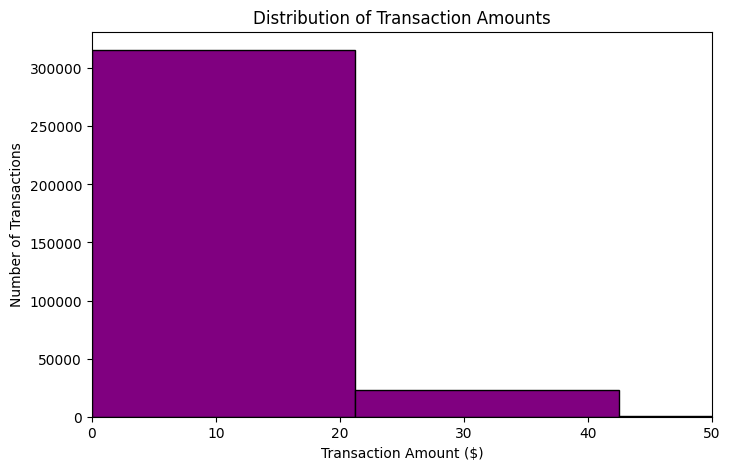

In [49]:
# Plot overall transaction amount distribution
plt.figure(figsize=(8,5))
plt.hist(merged_df['amount_spent'], bins=50, edgecolor='black', color='purple')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim(0, 50)  # Focus on main cluster (most transactions are small)
plt.show()

Most individual transactions are small, under $20. Very few transactions are large, leading to a highly skewed distribution.

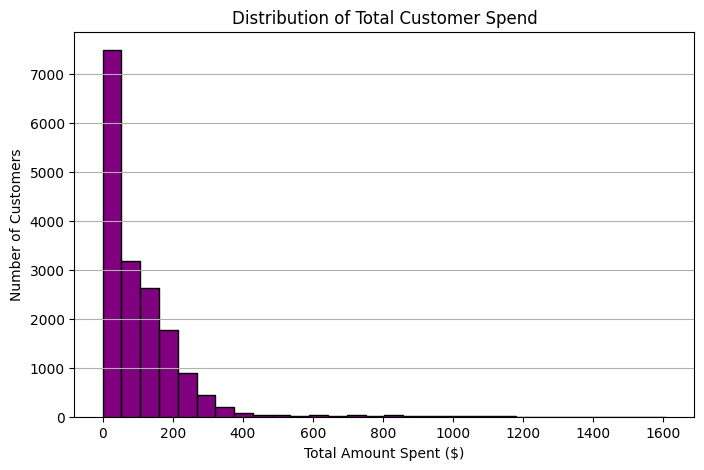

In [50]:
# Group by customer ('person') and sum their transaction amounts
spending_by_customer = merged_df.groupby('person')['amount_spent'].sum()

# Plot distribution
plt.figure(figsize=(8,5))
plt.hist(spending_by_customer, bins=30, edgecolor='black', color='purple')
plt.title('Distribution of Total Customer Spend')
plt.xlabel('Total Amount Spent ($)')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()

The majority of customers spent relatively low amounts overall (below 200). A small number of customers are high spenders, with totals reaching over $1,000.



# Modeling

## Classification (Logistic Regression, Random Forest)

In [51]:
# Create target variable
merged_df['completed_offer'] = (merged_df['event'] == 'offer completed').astype(int)

In [52]:
merged_df.columns

Index(['person', 'event', 'hours_since_start', 'offer_id', 'amount_spent',
       'days_since_start', 'reward', 'channels', 'difficulty', 'duration',
       'offer_type', 'offer_alias', 'gender', 'age', 'became_member_on',
       'income', 'completed_offer'],
      dtype='object')

In [53]:
# Feature engineering
merged_df['web'] = merged_df['channels'].apply(lambda x: 1 if isinstance(x, str) and 'web' in x else 0)
merged_df['email'] = merged_df['channels'].apply(lambda x: 1 if isinstance(x, str) and 'email' in x else 0)
merged_df['mobile'] = merged_df['channels'].apply(lambda x: 1 if isinstance(x, str) and 'mobile' in x else 0)
merged_df['social'] = merged_df['channels'].apply(lambda x: 1 if isinstance(x, str) and 'social' in x else 0)

In [54]:
from sklearn.model_selection import train_test_split

# Define feature columns
feature_cols = ['gender', 'age', 'income','offer_type', 'difficulty', 'reward', 'web', 'email', 'mobile', 'social']

# Prepare X and y
X = merged_df[feature_cols]
y = merged_df['completed_offer']

# Train/test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Quick check
print(X_train.shape, X_test.shape)

(272090, 10) (68023, 10)


In [55]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Separate columns
categorical_cols = ['gender', 'offer_type']
numerical_cols = ['age', 'income', 'difficulty', 'reward', 'web', 'email', 'mobile', 'social']

# Create a preprocessing pipeline with imputer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())]), numerical_cols), # Add SimpleImputer to numerical pipeline
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Create a pipeline: preprocessing + model
model = make_pipeline(
    preprocessor,
    LogisticRegression(max_iter=1000, random_state=42)
)

# Fit model on training data
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]  # Probability estimates for ROC AUC

# Evaluate model
print('Classification Report:')
print(classification_report(y_test, y_pred))

print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))

print('\nROC-AUC Score:')
print(roc_auc_score(y_test, y_prob))

Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     54596
           1       0.00      0.00      0.00     13427

    accuracy                           0.80     68023
   macro avg       0.40      0.50      0.45     68023
weighted avg       0.64      0.80      0.71     68023


Confusion Matrix:
[[54596     0]
 [13427     0]]

ROC-AUC Score:
0.6628570122150301


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


This is class imbalance:

- There are much more 0s (no completion) than 1s (completion).

- Logistic Regression without adjustment biases toward majority class.

Accuracy 80% is misleading because it just predicts everyone as 0.

In [56]:
from sklearn.ensemble import RandomForestClassifier

# Update the model pipeline to use Random Forest
rf_model = make_pipeline(
    preprocessor,  # same preprocessing pipeline (imputer, scaler, onehot)
    RandomForestClassifier(
        n_estimators=100,  # number of trees
        random_state=42,
        n_jobs=-1,         # use all CPUs to speed up
        class_weight='balanced'  # handle imbalance automatically
    )
)

# Train Random Forest model
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:,1]

# Evaluate model
print('Classification Report:')
print(classification_report(y_test, y_pred_rf))

print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred_rf))

print('\nROC-AUC Score:')
print(roc_auc_score(y_test, y_prob_rf))

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.63      0.70     54596
           1       0.17      0.31      0.22     13427

    accuracy                           0.56     68023
   macro avg       0.48      0.47      0.46     68023
weighted avg       0.66      0.56      0.60     68023


Confusion Matrix:
[[34125 20471]
 [ 9284  4143]]

ROC-AUC Score:
0.4718580080018826


Random Forest at least detected some class 1, though overall accuracy dropped. ROC-AUC also dropped, meaning Random Forest struggled overall to distinguish classes on this feature set.

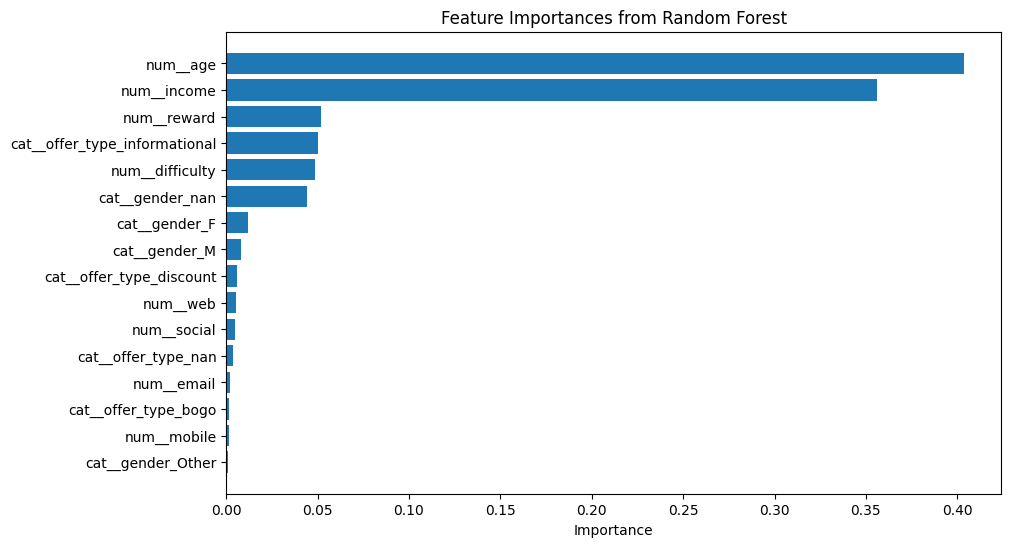

In [57]:
# Get feature importances
importances = rf_model.named_steps['randomforestclassifier'].feature_importances_

# Get feature names
feature_names = rf_model[:-1].get_feature_names_out()

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis()
plt.show()

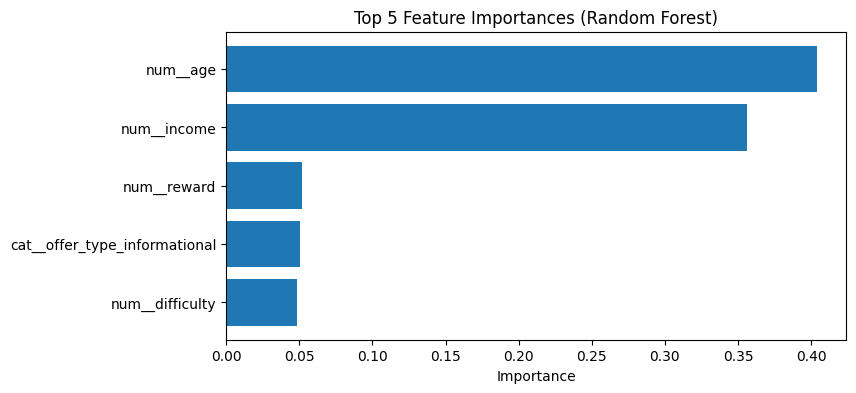

In [58]:
# Only show top 5 features
top_features = feature_importance_df.head(5)

plt.figure(figsize=(8,4))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Importance')
plt.title('Top 5 Feature Importances (Random Forest)')
plt.gca().invert_yaxis()
plt.show()

Age and income are by far the most influential predictors, followed by reward and difficulty of the offer. Marketing channels and gender information are less influential for predicting offer completion.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Define the parameter grid
param_grid = {
    'randomforestclassifier__n_estimators': [100, 200],
    'randomforestclassifier__max_depth': [5, 10, None],
    'randomforestclassifier__min_samples_split': [2, 5],
    'randomforestclassifier__min_samples_leaf': [1, 2]
}

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())]), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Create a pipeline with preprocessing and Random Forest
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('randomforestclassifier', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

# Set up GridSearchCV with the pipeline
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=3,
    scoring='roc_auc',
    verbose=1,
    n_jobs=-1
)

# Fit to the training data
grid_search.fit(X_train, y_train)

# Best model
best_rf_model = grid_search.best_estimator_

# Predict on test set
y_pred = best_rf_model.predict(X_test)
y_prob = best_rf_model.predict_proba(X_test)[:,1]

# Evaluate model
print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

print('ROC-AUC Score:')
print(roc_auc_score(y_test, y_prob))

Fitting 3 folds for each of 24 candidates, totalling 72 fits


The Random Forest model achieved an accuracy of 56% with a higher ROC-AUC score of 0.66.

It shows strong recall for completed offers (recall = 73% for class 1) but relatively low precision (precision = 27%), indicating the model is better at capturing positives than precisely identifying them.

## Clustering (KMeans, PCA)

In [ ]:
# Transactions
transactions = event_df[event_df['event'] == 'transaction']
transactions_summary = transactions.groupby('person').agg(
    total_transactions=('amount_spent', 'count'),
    total_amount_spent=('amount_spent', 'sum')
)

# Offers
offers_received = event_df[event_df['event'] == 'offer received'].groupby('person').size().rename('offers_received')
offers_viewed = event_df[event_df['event'] == 'offer viewed'].groupby('person').size().rename('offers_viewed')
offers_completed = event_df[event_df['event'] == 'offer completed'].groupby('person').size().rename('offers_completed')

# Customer profiles
customer_profile = customer.set_index('id')[['age', 'income']]

# Merge everything
customer_features = customer_profile \
    .join([transactions_summary, offers_received, offers_viewed, offers_completed]) \
    .fillna(0)  # Fill missing values with 0

# Quick check
customer_features.head()

In [ ]:
# Select the features for clustering
features_for_clustering = ['age', 'income', 'total_transactions', 'total_amount_spent', 'offers_received', 'offers_viewed', 'offers_completed']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform
X_scaled = scaler.fit_transform(customer_features[features_for_clustering])

# Quick check
print(X_scaled.shape)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Try different values of k
inertia = []
silhouette_scores = []
k_range = range(2, 11)  # Test k=2 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette)

# Plot Inertia (Elbow Method)
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Plot Silhouette Score
plt.figure(figsize=(8, 4))
plt.plot(k_range, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_range)
plt.grid(True)
plt.show()

Elbow Method:

- There is a noticeable bend ("elbow") at around k = 5.

- After 5, the inertia continues to decrease but at a slower rate, meaning additional clusters add less value.

Silhouette Score:

- The highest silhouette score occurs at k = 2, but it's very low overall (~0.21), suggesting the data isn't naturally very separable into tight clusters.

- Around k = 5, the silhouette score is slightly better than other higher k values (after the drop from k=2).

Based on both plots, choosing **k = 5** is reasonable.

In [ ]:
from sklearn.cluster import KMeans

# Train KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
customer_features['cluster'] = kmeans.fit_predict(X_scaled)

print(customer_features['cluster'].value_counts().sort_index())

The clusters are balanced, each cluster has about 2700–3200 customers. There is no extreme imbalance, which is good for segmentation.

In [ ]:
# Cluster profile
cluster_profiles = customer_features.groupby('cluster').mean()
cluster_profiles

**Cluster 0 (Low-Engagement Customers):** Lowest transactions, lowest spending, lower offer completion.

**Cluster 1 (High-Value Loyalists):** High transactions (10.4), highest spending (265), and high offer completion (8.25 offers). Likely the most engaged and high-value customers.

**Cluster 2 (Low-Spend Infrequent Users):** Low spending, low engagement — possible lower-priority group.

**Cluster 3 (Affluent Moderates):** Older, wealthier, but medium engagement — mid-range in transactions and offer completions.

**Cluster 4 (Frequent Low-Spenders):** Most frequent buyers (15.1 transactions) but lower spending (122) per transaction. Younger, moderately active customers.

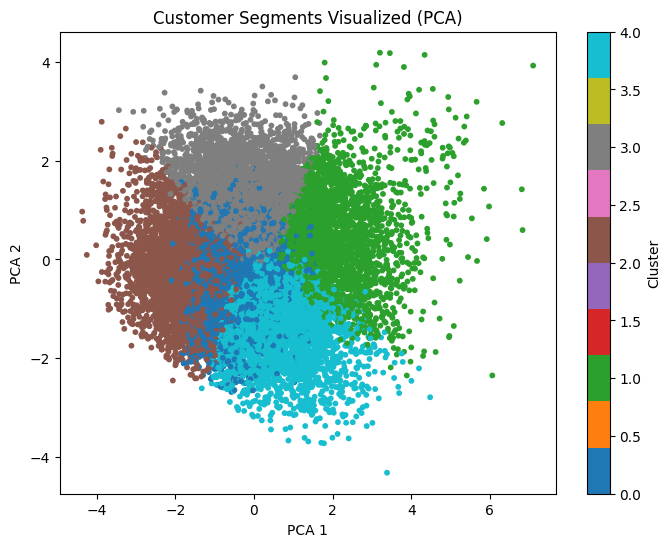

In [66]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=customer_features['cluster'], cmap='tab10', s=10)
plt.title('Customer Segments Visualized (PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()

The PCA plot helps visualize 5 customer segments in a 2D space, showing that the clusters are reasonably separated. It confirms that the KMeans clustering found meaningful patterns in the customer data.

In [67]:
# Reset index
cluster_profiles.reset_index(inplace=True)

# Create a mapping from cluster number to cluster name
cluster_name_mapping = {
    0: 'Low-Engagement Customers',
    1: 'High-Value Loyalists',
    2: 'Low-Spend Infrequent Users',
    3: 'Affluent Moderates',
    4: 'Frequent Low-Spenders'
}

# Add a new column 'cluster_name'
customer_features['cluster_name'] = customer_features['cluster'].map(cluster_name_mapping)
cluster_profiles['cluster_name'] = cluster_profiles['cluster'].map(cluster_name_mapping)

In [68]:
# Calculate Offer Completion Rate
customer_features['offer_completion_rate'] = (
    customer_features['offers_completed'] / customer_features['offers_received']
).fillna(0)

# Calculate Sensitivity to Offer
customer_features['sensitivity_to_offer'] = (
    customer_features['offers_completed'] / customer_features['total_transactions']
).fillna(0)

In [69]:
customer_features.head()

,age,income,total_transactions,total_amount_spent,offers_received,offers_viewed,offers_completed,cluster,cluster_name,offer_completion_rate,sensitivity_to_offer
id,,,,,,,,,,,
0610b486422d4921ae7d2bf64640c50b,55.0,112000.0,3.0,77.01,2.0,0.0,2.0,3,Affluent Moderates,1.000000,0.666667
78afa995795e4d85b5d9ceeca43f5fef,75.0,100000.0,7.0,159.27,4.0,4.0,6.0,3,Affluent Moderates,1.500000,0.857143
e2127556f4f64592b11af22de27a7932,68.0,70000.0,3.0,57.73,4.0,3.0,4.0,3,Affluent Moderates,1.000000,1.333333
389bc3fa690240e798340f5a15918d5c,65.0,53000.0,3.0,36.43,6.0,6.0,10.0,1,High-Value Loyalists,1.666667,3.333333
2eeac8d8feae4a8cad5a6af0499a211d,58.0,51000.0,4.0,15.62,3.0,2.0,2.0,2,Low-Spend Infrequent Users,0.666667,0.500000


In [70]:
cluster_profiles.head()

,cluster,age,income,total_transactions,total_amount_spent,offers_received,offers_viewed,offers_completed,cluster_name
0,0,53.949025,58711.597674,4.791995,36.991628,5.167978,4.042764,2.073212,Low-Engagement Customers
1,1,60.527798,78142.282370,10.406364,265.413061,5.247988,4.546452,8.250914,High-Value Loyalists
2,2,47.825177,52352.543464,6.350612,44.561623,3.418867,2.042176,1.555055,Low-Spend Infrequent Users
3,3,65.251889,87888.224181,5.761020,128.918215,3.966310,2.772670,4.711587,Affluent Moderates
4,4,43.819449,49272.917393,15.100035,122.137762,4.795051,3.627048,5.711398,Frequent Low-Spenders


In [71]:
# Export the clustering dataset
customer_features.reset_index().to_csv(os.path.join(data_path, 'customer_features.csv'), index=False)
cluster_profiles.to_csv(os.path.join(data_path, 'cluster_profiles.csv'), index=False)